# Modelling - Evaluation:
<h3> In this Notebook i'll first split the dataframe which now contains the wordembedding vector representation for 
 the comment and topic columns, into Training and Test set at 70:30 </h3>

<h3> Next: We'll apply the following models "listed below" to our data and then use accuracy to measure the model with the best performance 
    <p>The chossen model will then be Tested on unseen data and  explored using other Evaluation Metrics.</p>
    <p>S/N: Elements of Grid Search are be used to tune Hyperparameter for MLP</P>
</h3>

<p>
<ul>
    <li> Support Vector Machine</li>
    <li> Logistic Regression (X) </li>
    <li> RandomForest</li>
    <li> XGBoost / LSTM Neural Network / MLP </li>
    <li> Naive Bayes (X)</li>
</ul>
</p>

<h3> Here are some evaluation metric we'll be using for the model</h3>
<p>
<ul>
    <li> F1 score</li>
    <li> Accuracy </li>
    <li> Precision</li>
    <li> Recall </li>
    <li> Confusion Matrix</li>
</ul>
</p>

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

df=pd.read_csv("model_data_4.csv")
df

,target,a,b,c,d,e,f,0,1,2,...,190.1,191.1,192.1,193.1,194.1,195.1,196.1,197.1,198.1,199.1
0,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.017109,-0.238943,0.162469,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
1,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.051815,-0.113376,0.018852,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
2,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.060451,-0.172936,-0.026294,...,0.327560,-0.166819,0.042079,-0.034599,0.029893,0.282038,-0.139885,0.186054,0.193534,-0.047213
3,neg,1.0,0.0,0.0,0.0,1.0,0.0,-0.049010,-0.311965,0.169213,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
4,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.166559,-0.271395,0.264561,...,0.226036,-0.187280,0.364145,0.215561,-0.072055,-0.327634,-0.127996,0.290648,-0.068311,0.529654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13809,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.227720,-0.169876,-0.029033,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830
13810,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.199832,-0.413089,0.040101,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830
13811,neg,1.0,0.0,0.0,0.0,0.0,1.0,0.048078,-0.337632,-0.105340,...,0.101448,-0.192111,0.098484,0.211544,-0.106624,-0.123411,-0.118704,0.034215,0.091403,0.047239
13812,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.120930,-0.458627,0.008752,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830


In [2]:
# Syntax: droping y/target variable then use remainder with ->> df.drop(['target'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

# Split data in train test set using scikitlearn tr-t-s() funtion and  syntax below:
train, test = train_test_split(df, test_size=0.3, random_state=42)        # 30% test set split
X_train = train.drop(['target','d','e','f'], axis=1).values     #should remain 306 features
X_test = test.drop(['target','d','e','f'], axis=1).values
y_train = train['target']
y_test = test['target']

# Or Alternatively:::
# use pandas sampling funtion to Split Data into Training and test sets:
# df_copy = df.copy()
# df_train = df_copy.sample(frac=0.70, random_state=1)
# df_test = df_copy.drop(df_train.index)
# 
# print(df_train.shape)
# print(df_test.shape)

In [4]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(9669, 403)
(4145, 403)
(9669,)
(4145,)


<AxesSubplot:>

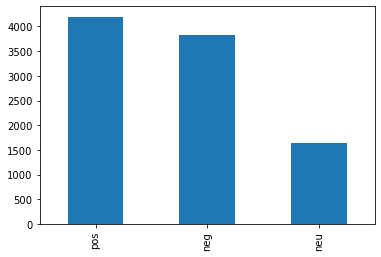

In [5]:
# observe distribution to see if labels are unbalanced and need undersampling/Oversampling techniques applied 
train['target'].value_counts().plot(kind='bar')


<AxesSubplot:>

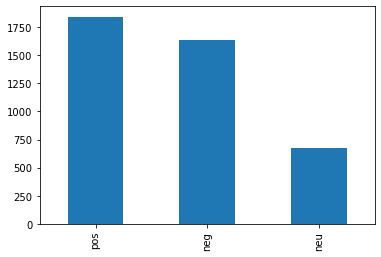

In [6]:
test['target'].value_counts().plot(kind='bar')

<h3> SVM(support Vector Machine) Model ::: </h3>

<p> S/N:: Logistic regression implemtation may need one-hot-encoded target variables because y variable contains >2 multiclass labels
 Different parameters from default will need to be applied due to multiclass label
</p>


In [7]:
from sklearn import svm
from sklearn import model_selection           #for implementing cross validation

svc = svm.SVC(kernel='linear', C=1, probability=True)     # Initiate SVM model

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)   # 10 K-fold Cross validation

cv_results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')  # results

print(f"SVM Model Accuracy: Mean:{cv_results.mean()}   S.D: {cv_results.std()}")


SVM Model Accuracy: Mean:0.698623092058639   S.D: 0.015030160448486457


In [8]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)
y_pred = svc.predict(X_test)

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report


print(f"Model F1 Score is: {f1_score(y_test, y_pred, average='macro')}")
print(f"Model Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Model Precision is: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Model Recall is: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(end='\n')

# Return Sturctured Classification Report
print(classification_report(y_test, y_pred))

Model F1 Score is: 0.7426681716271891
Model Accuracy is: 0.6776839565741858
Model Precision is: 0.7426405056878348
Model Recall is: 0.7427092213697074

              precision    recall  f1-score   support

         neg       0.59      0.59      0.59      1632
         neu       1.00      1.00      1.00       673
         pos       0.64      0.63      0.64      1840

    accuracy                           0.68      4145
   macro avg       0.74      0.74      0.74      4145
weighted avg       0.68      0.68      0.68      4145



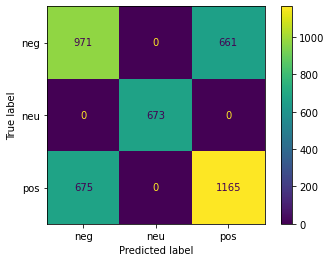

In [9]:
# Generate a confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=svc.classes_) #can add normalise args (normalize='all'/'pred'/'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()


<h3> Random Forest Classifier ::: </h3>

S/N: Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=11)

rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy') 

print(f"Random Forrest Model Accuracy: Mean:{rf_results.mean()}   S.D: {rf_results.std()}")

Random Forrest Model Accuracy: Mean:0.8758893377952773   S.D: 0.010951613117206199


In [11]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report


print(f"Model F1 Score is: {f1_score(y_test, y_pred, average='macro')}")
print(f"Model Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Model Precision is: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Model Recall is: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(end='\n')

# Return Sturctured Classification Report
print(classification_report(y_test, y_pred))

Model F1 Score is: 0.9012161157207589
Model Accuracy is: 0.8767189384800965
Model Precision is: 0.9023618428446109
Model Recall is: 0.9006393861892583

              precision    recall  f1-score   support

         neg       0.86      0.82      0.84      1632
         neu       1.00      1.00      1.00       673
         pos       0.85      0.88      0.86      1840

    accuracy                           0.88      4145
   macro avg       0.90      0.90      0.90      4145
weighted avg       0.88      0.88      0.88      4145



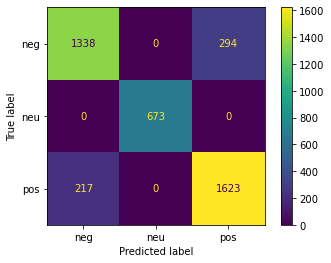

In [12]:
# Generate a confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_) #can add normalise args (normalize='all'/'pred'/'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [13]:
#Auc Roc curve plot
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Binarize the output
ytr = label_binarize(y_train, classes=['pos', 'neg', 'neu'])
n_classes = ytr.shape[1]
yts = label_binarize(y_test, classes=['pos', 'neg', 'neu'])

# re-model
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train,ytr)
ypd = rf.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yts[:, i], ypd[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yts.ravel(), ypd.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

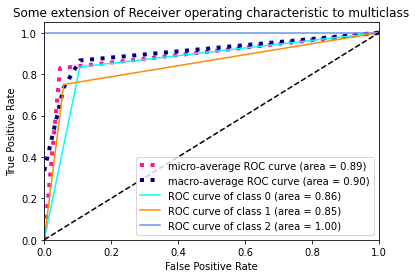

In [14]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

<h3> MultiLayer Perceptron (MLP) ::: </h3>


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data  
scaler = StandardScaler()  
scaler.fit(X_train)  
# Transform X train data
X_train = scaler.transform(X_train)  
# Transform X test data
X_test = scaler.transform(X_test)  

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2,3), max_iter=2000, activation='logistic')

mlp_results = model_selection.cross_val_score(mlp, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"Multlayer Perceptron Model Accuracy: Mean: {mlp_results.mean()}  S.D: {mlp_results.std()}")

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

Multlayer Perceptron Model Accuracy: Mean: 0.6994507141465462  S.D: 0.02313525027133378


In [16]:
# Implementing Grid Search to explore the hyperparameters on MLP

from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (1,2),(2,3),(3,),(4,),(5,),(10,),(12,4),(16,2),(17,),(18,),(20,)
             ],
            'max_iter' : [2000]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_train,y_train)


print("Best parameters set found on development set:")
print(clf.best_params_)


C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'max_iter': 2000, 'solver': 'adam'}


In [17]:
#clf.cv_results_ 
bestModel = clf.best_estimator_
print(bestModel)
print(clf.best_score_)
print(clf.best_params_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=2000)
0.8473471920570897
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'max_iter': 2000, 'solver': 'adam'}


In [18]:
mlp2 = MLPClassifier(solver='adam', hidden_layer_sizes=(20,), max_iter=2000, activation='logistic').fit(X_train,y_train)
y_pred = mlp2.predict(X_test)


<h3> Evaluation Metrics for 'final selected model'</h3>

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report


print(f"Model F1 Score is: {f1_score(y_test, y_pred, average='macro')}")
print(f"Model Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Model Precision is: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Model Recall is: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(end='\n')

# Return Sturctured Classification Report
print(classification_report(y_test, y_pred))





Model F1 Score is: 0.8993664758625649
Model Accuracy is: 0.8743063932448734
Model Precision is: 0.9001449664956773
Model Recall is: 0.8989201477692527

              precision    recall  f1-score   support

         neg       0.85      0.82      0.84      1632
         neu       1.00      1.00      1.00       673
         pos       0.85      0.87      0.86      1840

    accuracy                           0.87      4145
   macro avg       0.90      0.90      0.90      4145
weighted avg       0.87      0.87      0.87      4145



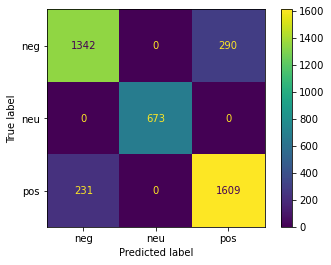

In [20]:
# Generate a confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=mlp2.classes_) #can add normalise args (normalize='all'/'pred'/'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp2.classes_)
disp.plot()
plt.show()



In [21]:
#Auc Roc curve plot
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Binarize the output
ytr = label_binarize(y_train, classes=['pos', 'neg', 'neu'])
n_classes = ytr.shape[1]
yts = label_binarize(y_test, classes=['pos', 'neg', 'neu'])

# re-model
mlp2 = MLPClassifier(solver='adam', hidden_layer_sizes=(17,), max_iter=2000, activation='logistic').fit(X_train,ytr)
ypd = mlp2.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yts[:, i], ypd[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yts.ravel(), ypd.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


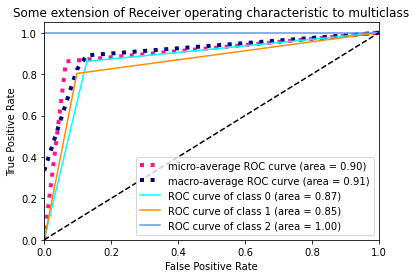

In [22]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# Deployment:

In [23]:
## save model
import pickle
pickle.dump(mlp2, open("savedmodel.sav", 'wb'))

## some time later...
## load the model from disk
#rf2 = pickle.load(open("savedmodel.sav", 'rb'))
#pred = mlp2.predict(X_test)

Conclusion:

It can be observed that both Random Forest and Neural Network(MLP) models performs well compared to linear support vector machines.

# ...

# .....

# Limitations and other considerations

A lot has been considerd in this research but still there is plenty of room for other things to try out.

We have built so many models, we can definitely try model ensembling.

Take out Parts-of-Speech tagging and try creating with new features with stemming or without any stem/lemma.

Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF then build models using these features

We can give pretrained word-embeddings models a try as the embedding learned from the data is not very accurate and doesn't perform well without the additional features

<p>Others: Try implementing LTSM Neural Network using logic demonstated <a href:"https://www.kaggle.com/kritanjalijain/twitter-sentiment-analysis-lstm"> on this Kaggle Notebook </a></p>